In [2]:
import urllib.request
import urllib.parse
import json
import pandas as pd
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# # 最初の
# pref = pd.read_pickle("pref_origin.pkl")
# output = []
# for idx,p in pref.iterrows():
#     a = p.pref.replace(" ","")
#     output.append(a)
# pref.pref = output
# p = []
# for i in pref.prefen:
#     a = i.split("-")[0]
#     p.append(a)
# pref.prefen = p

# # meltしてyearなど追加
# pref = pref.melt(id_vars=["prefen","pref"],var_name="types")
# pref["year"] = pref.types.str.extract("(\d+)",expand=True)[0].astype(int)
# pref["gender"] = pref.types.str.replace("\d+","").apply(lambda x: 1 if "男"==x else 0)
# pref = pref.drop("types",axis=1)

# pref["prefen"] = pref.prefen.str.lower()
# pref["value"] = pref.value.apply(lambda x: x*1000)

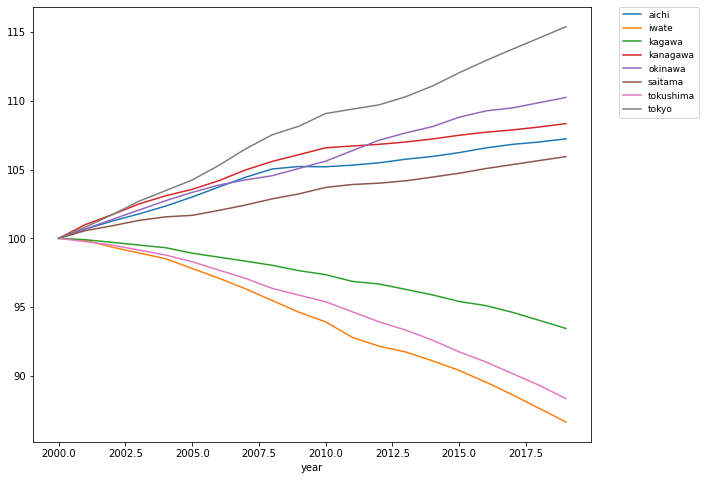

In [8]:
# 割合
pref = pd.read_pickle("submit.pkl")
sum_pref = pref.groupby(["prefen","year"]).value.sum().reset_index()

output = []
for idx,row in sum_pref.groupby(["prefen"]):
    root_val = row.reset_index().sort_values("year").value[0]
    row["ratio"] = row.value.apply(lambda x: 100 if x==root_val else round(x/root_val*100,2))
    output.append(row)

all_pref = pd.concat(output) 
all_pref = all_pref[all_pref.prefen.str.contains("iwate|tokushima|kagawa|tokyo|okinawa|kanagawa|aichi|saitama")]
all_pref = all_pref.pivot_table(index=["prefen"],columns="year",values="ratio",aggfunc="sum")
show_all_pref = all_pref.T

fig, ax = plt.subplots(figsize=(10, 8))

show_all_pref.plot(kind="line",ax=ax)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=9)
plt.show()

In [6]:
# # 徳島香川東京の人口推移
# pref_tokushima = pref[pref.prefen.str.contains("tokushima|kagawa|tokyo")]
# pref_tokushima = pref_tokushima.groupby(["prefen","year"]).value.sum()
# pref_tokushima = pref_tokushima.reset_index().set_index("prefen")
# pref_tokushima = pref_tokushima.pivot_table(index=["prefen"],columns="year",values="value",aggfunc="sum")
# show_data = pref_tokushima.T

# fig, ax = plt.subplots(figsize=(10, 8))

# show_data.plot(kind="line", stacked=True, ax=ax)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=9)
# plt.show()

In [3]:
pref = pd.read_pickle("submit.pkl")

In [5]:
pref["gender"] = pref.gender.apply(lambda x: "man" if x == 1 else "woman")

In [7]:
pref = pref.pivot_table(index=["prefen","pref","year"],columns="gender",values="value").reset_index()
pref["population"] = pref.man + pref.woman

In [9]:
prefs = """北海道	北海道
東北	青森県、岩手県、秋田県、宮城県、山形県、福島県
関東	茨城県、栃木県、群馬県、埼玉県、千葉県、東京都、神奈川県
中部	新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県
近畿	三重県、滋賀県、奈良県、和歌山県、京都府、大阪府、兵庫県
中国	岡山県、広島県、鳥取県、島根県、山口県
四国	香川県、徳島県、愛媛県、高知県
九州	福岡県、佐賀県、長崎県、大分県、熊本県、宮崎県、鹿児島県、沖縄県""".split("\n")
regional_list = [p.split("\t")[::-1] for p in prefs]
regional_list

[['北海道', '北海道'],
 ['青森県、岩手県、秋田県、宮城県、山形県、福島県', '東北'],
 ['茨城県、栃木県、群馬県、埼玉県、千葉県、東京都、神奈川県', '関東'],
 ['新潟県、富山県、石川県、福井県、山梨県、長野県、岐阜県、静岡県、愛知県', '中部'],
 ['三重県、滋賀県、奈良県、和歌山県、京都府、大阪府、兵庫県', '近畿'],
 ['岡山県、広島県、鳥取県、島根県、山口県', '中国'],
 ['香川県、徳島県、愛媛県、高知県', '四国'],
 ['福岡県、佐賀県、長崎県、大分県、熊本県、宮崎県、鹿児島県、沖縄県', '九州']]

In [10]:
eng_regional_dict = dict(
    zip(['中部', '東北', '関東', '四国', '九州', '中国', '北海道', '近畿'], ['Chubu','Tohoku','Kanto','Shikoku','Kyushu','China','Hokkaido','Kinki'])
)

In [12]:
def get_regional_div(pref):
    for region in regional_list:
        if pref in region[0]:
            return region[1]
    return None

In [13]:
pref["region"] = pref.pref.apply(get_regional_div)

In [16]:
pref["eng_region"] = pref.region.apply(lambda x: eng_regional_dict[x].lower())

In [17]:
pref

gender,prefen,pref,year,man,woman,population,region,eng_region
0,aichi,愛知県,2000,3526000,3518000,7044000,中部,chubu
1,aichi,愛知県,2001,3551000,3540000,7091000,中部,chubu
2,aichi,愛知県,2002,3569000,3563000,7132000,中部,chubu
3,aichi,愛知県,2003,3589000,3580000,7169000,中部,chubu
4,aichi,愛知県,2004,3611000,3598000,7209000,中部,chubu
...,...,...,...,...,...,...,...,...
935,yamanashi,山梨県,2015,408000,427000,835000,中部,chubu
936,yamanashi,山梨県,2016,406000,424000,830000,中部,chubu
937,yamanashi,山梨県,2017,403000,421000,824000,中部,chubu
938,yamanashi,山梨県,2018,400000,417000,817000,中部,chubu


In [10]:
pref = pd.read_pickle("submit.pkl")
sum_pref = pref.groupby(["prefen","year"]).value.sum().reset_index()

output = []
for idx,row in sum_pref.groupby(["prefen"]):
    root_val = row.reset_index().sort_values("year").value[0]
    row["ratio"] = row.value.apply(lambda x: 100 if x==root_val else round(x/root_val*100,2))
    output.append(row)

all_pref = pd.concat(output) 

In [24]:
all_pref[all_pref.year == 2019].sort_values("ratio",ascending=False)

,prefen,year,value,ratio
819,tokyo,2019,13921000,115.38
639,okinawa,2019,1453000,110.24
379,kanagawa,2019,9198000,108.34
19,aichi,2019,7553000,107.23
699,saitama,2019,7350000,105.94
79,chiba,2019,6260000,105.64
719,shiga,2019,1414000,105.37
139,fukuoka,2019,5104000,101.75
659,osaka,2019,8809000,100.05
259,hyogo,2019,5466000,98.47
